In [87]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pylab
from scipy.signal import *
from scipy.fftpack import *
from control.matlab import *

# 5.2.1
В соответствии с номером варианта рассчитайте ФНЧ с аппроксимацией Баттерворта.

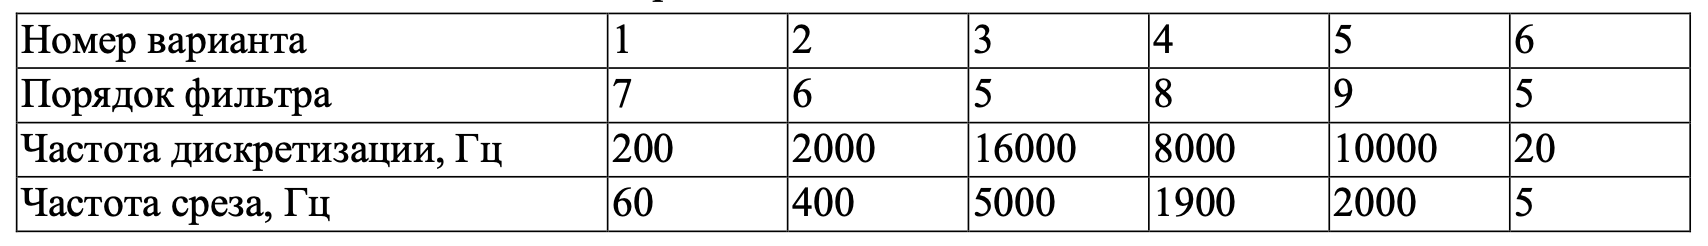

Постройте АЧХ и ФЧХ, диаграмму расположения нулей и полюсов передаточной функции, значимую часть импульсной характеристики. Каким образом можно получить каждые два графика из третьего?

In [88]:
pow = 8
fs = 8000
fsr = 1900
Nquist = 2 * fsr / fs

b, a = butter(pow, Nquist)
sgnl = freqz(b, a)

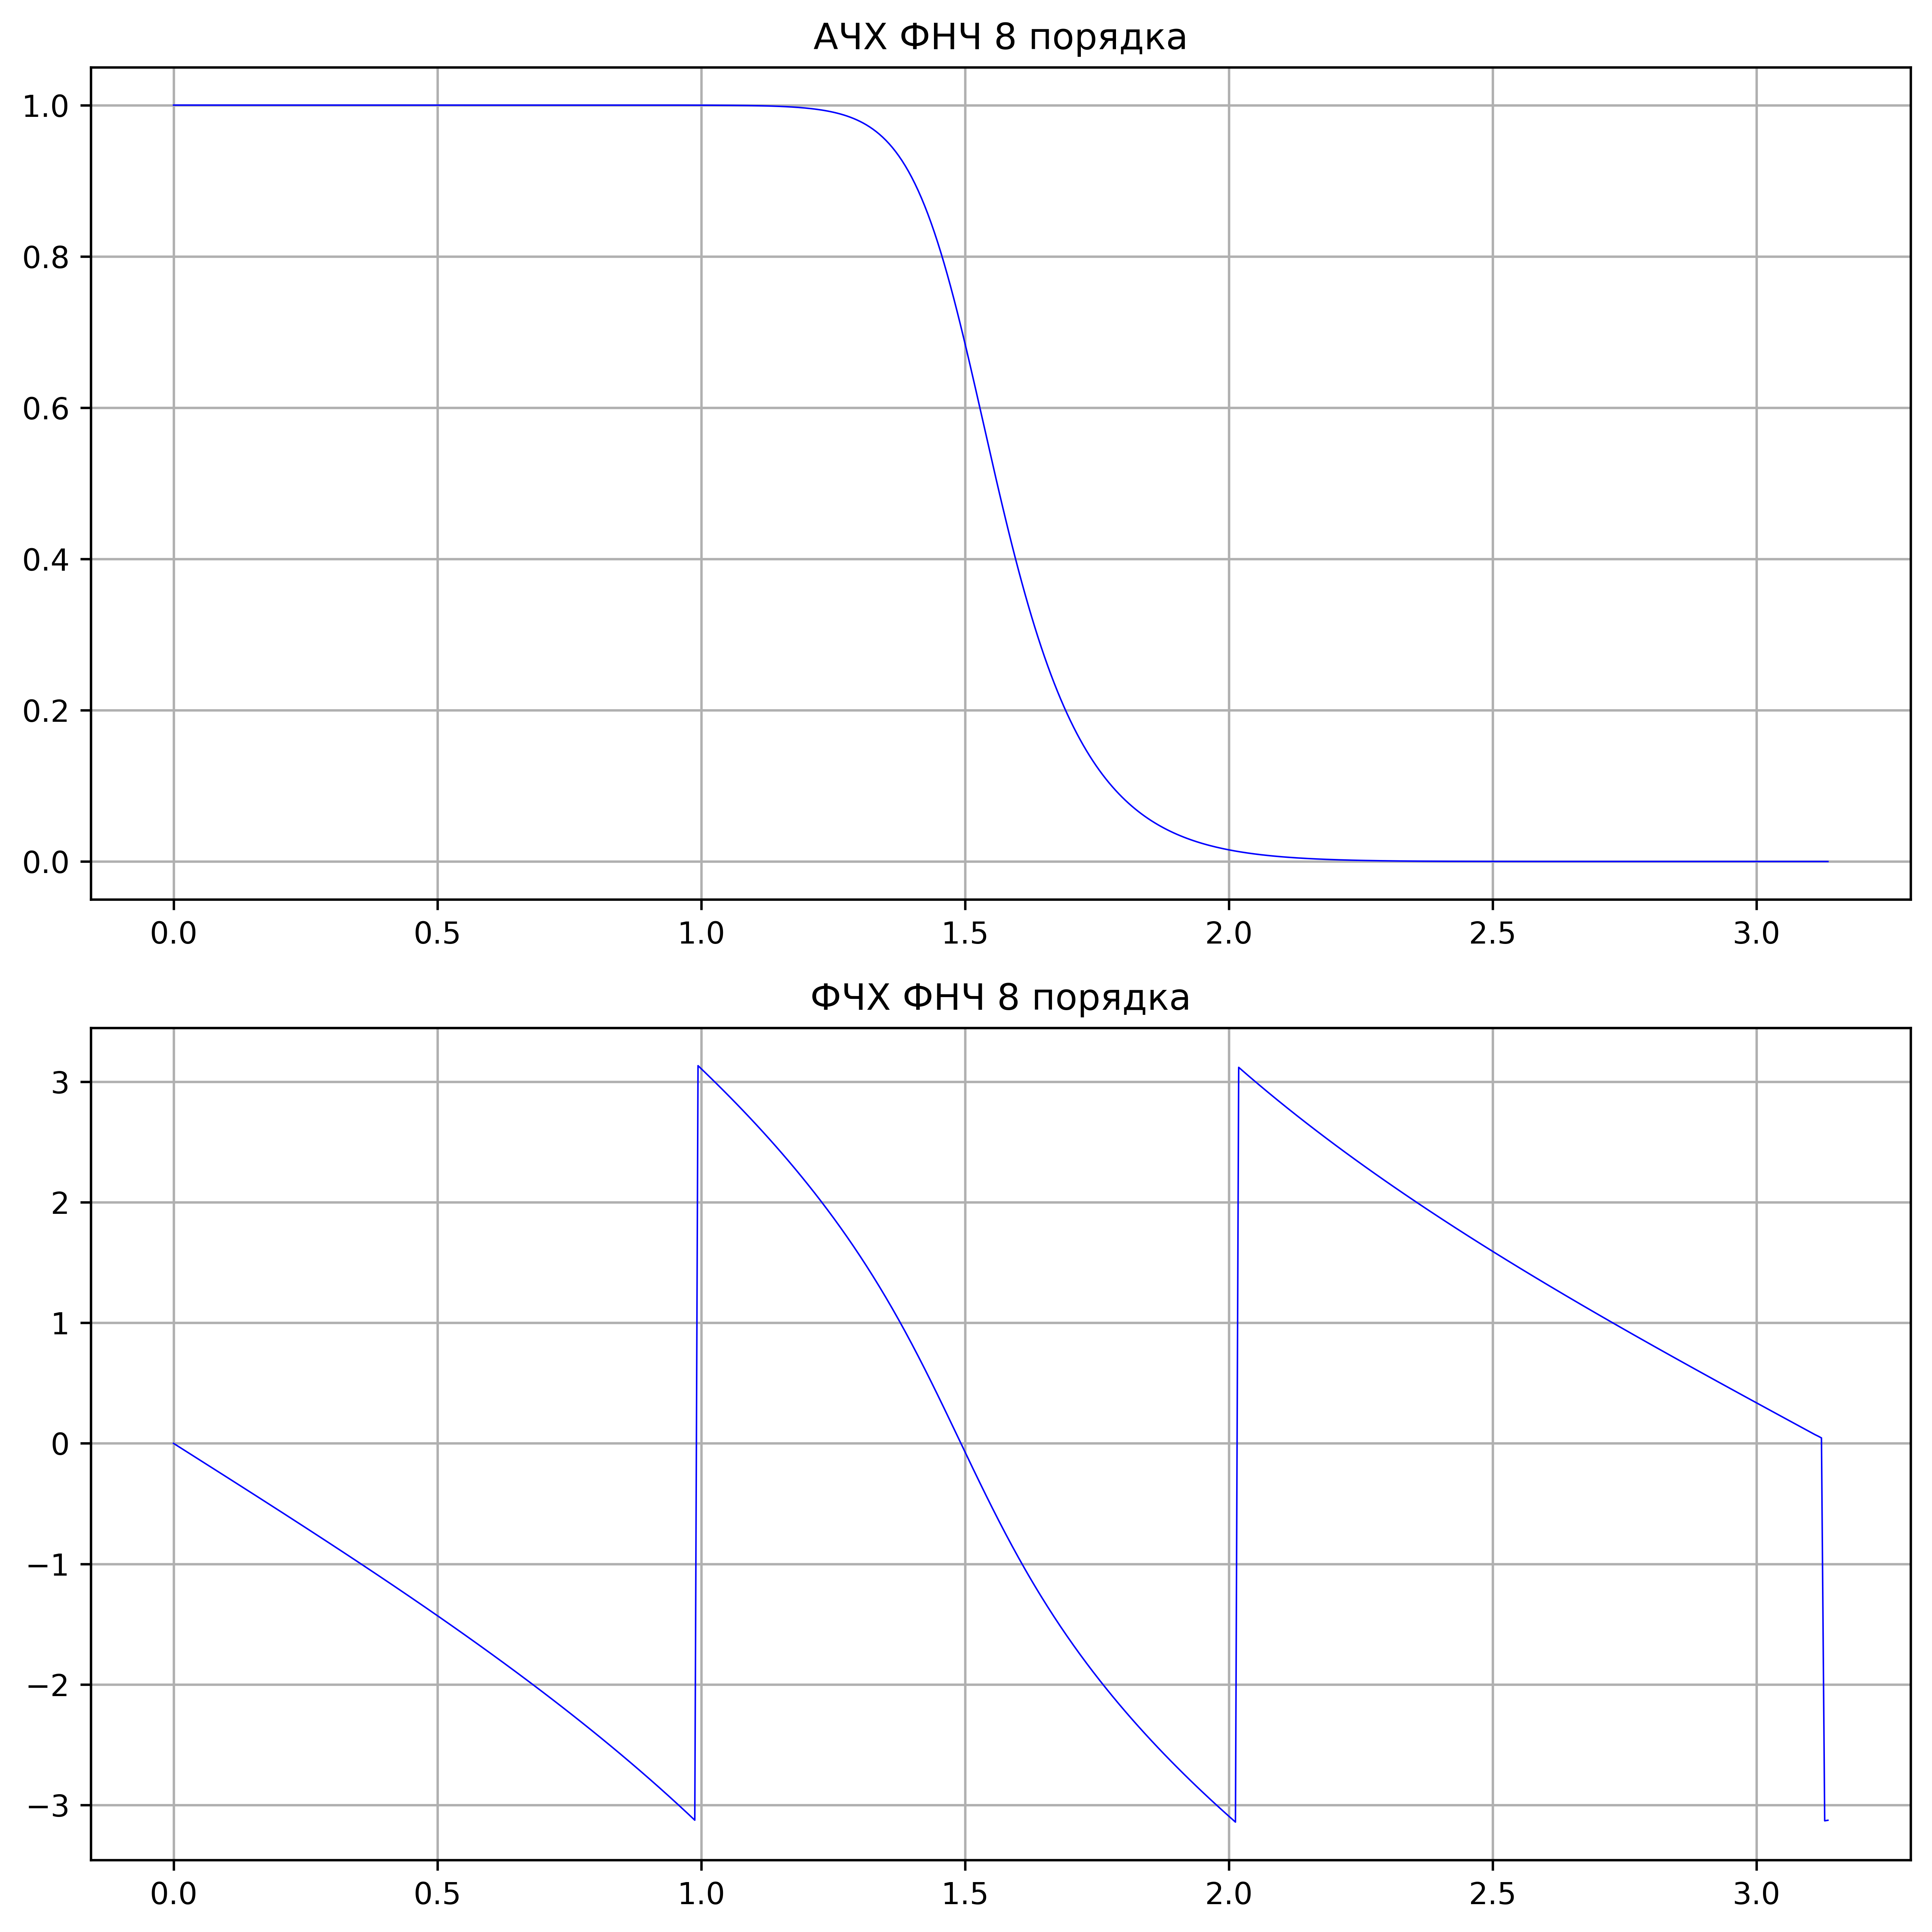

In [89]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

pylab.subplot(2, 1, 1)
pylab.plot(sgnl[0], np.abs(sgnl[1]), linestyle='-', color='b', linewidth=0.5)
pylab.grid()
pylab.xlabel('')
pylab.ylabel('')
pylab.title(f'АЧХ ФНЧ {pow} порядка')

pylab.subplot(2, 1, 2)
pylab.plot(sgnl[0], np.angle(sgnl[1]), linestyle='-', color='b', linewidth=0.5)
pylab.grid()
pylab.xlabel('')
pylab.ylabel('')
pylab.title(f'ФЧХ ФНЧ {pow} порядка')

pylab.tight_layout()
pylab.savefig('5_2_1_PH.png', dpi=600)
pylab.show()

# 5.2.2
Выполните задание 5.2.1, воспользовавшись функцией cheby1 и приняв допустимую неравномерность АЧХ в полосе пропускания 0,5 дБ.

In [90]:
Rp = 0.5
b, a = cheby1(pow, Rp, Nquist)
w, h = freqz(b, a)

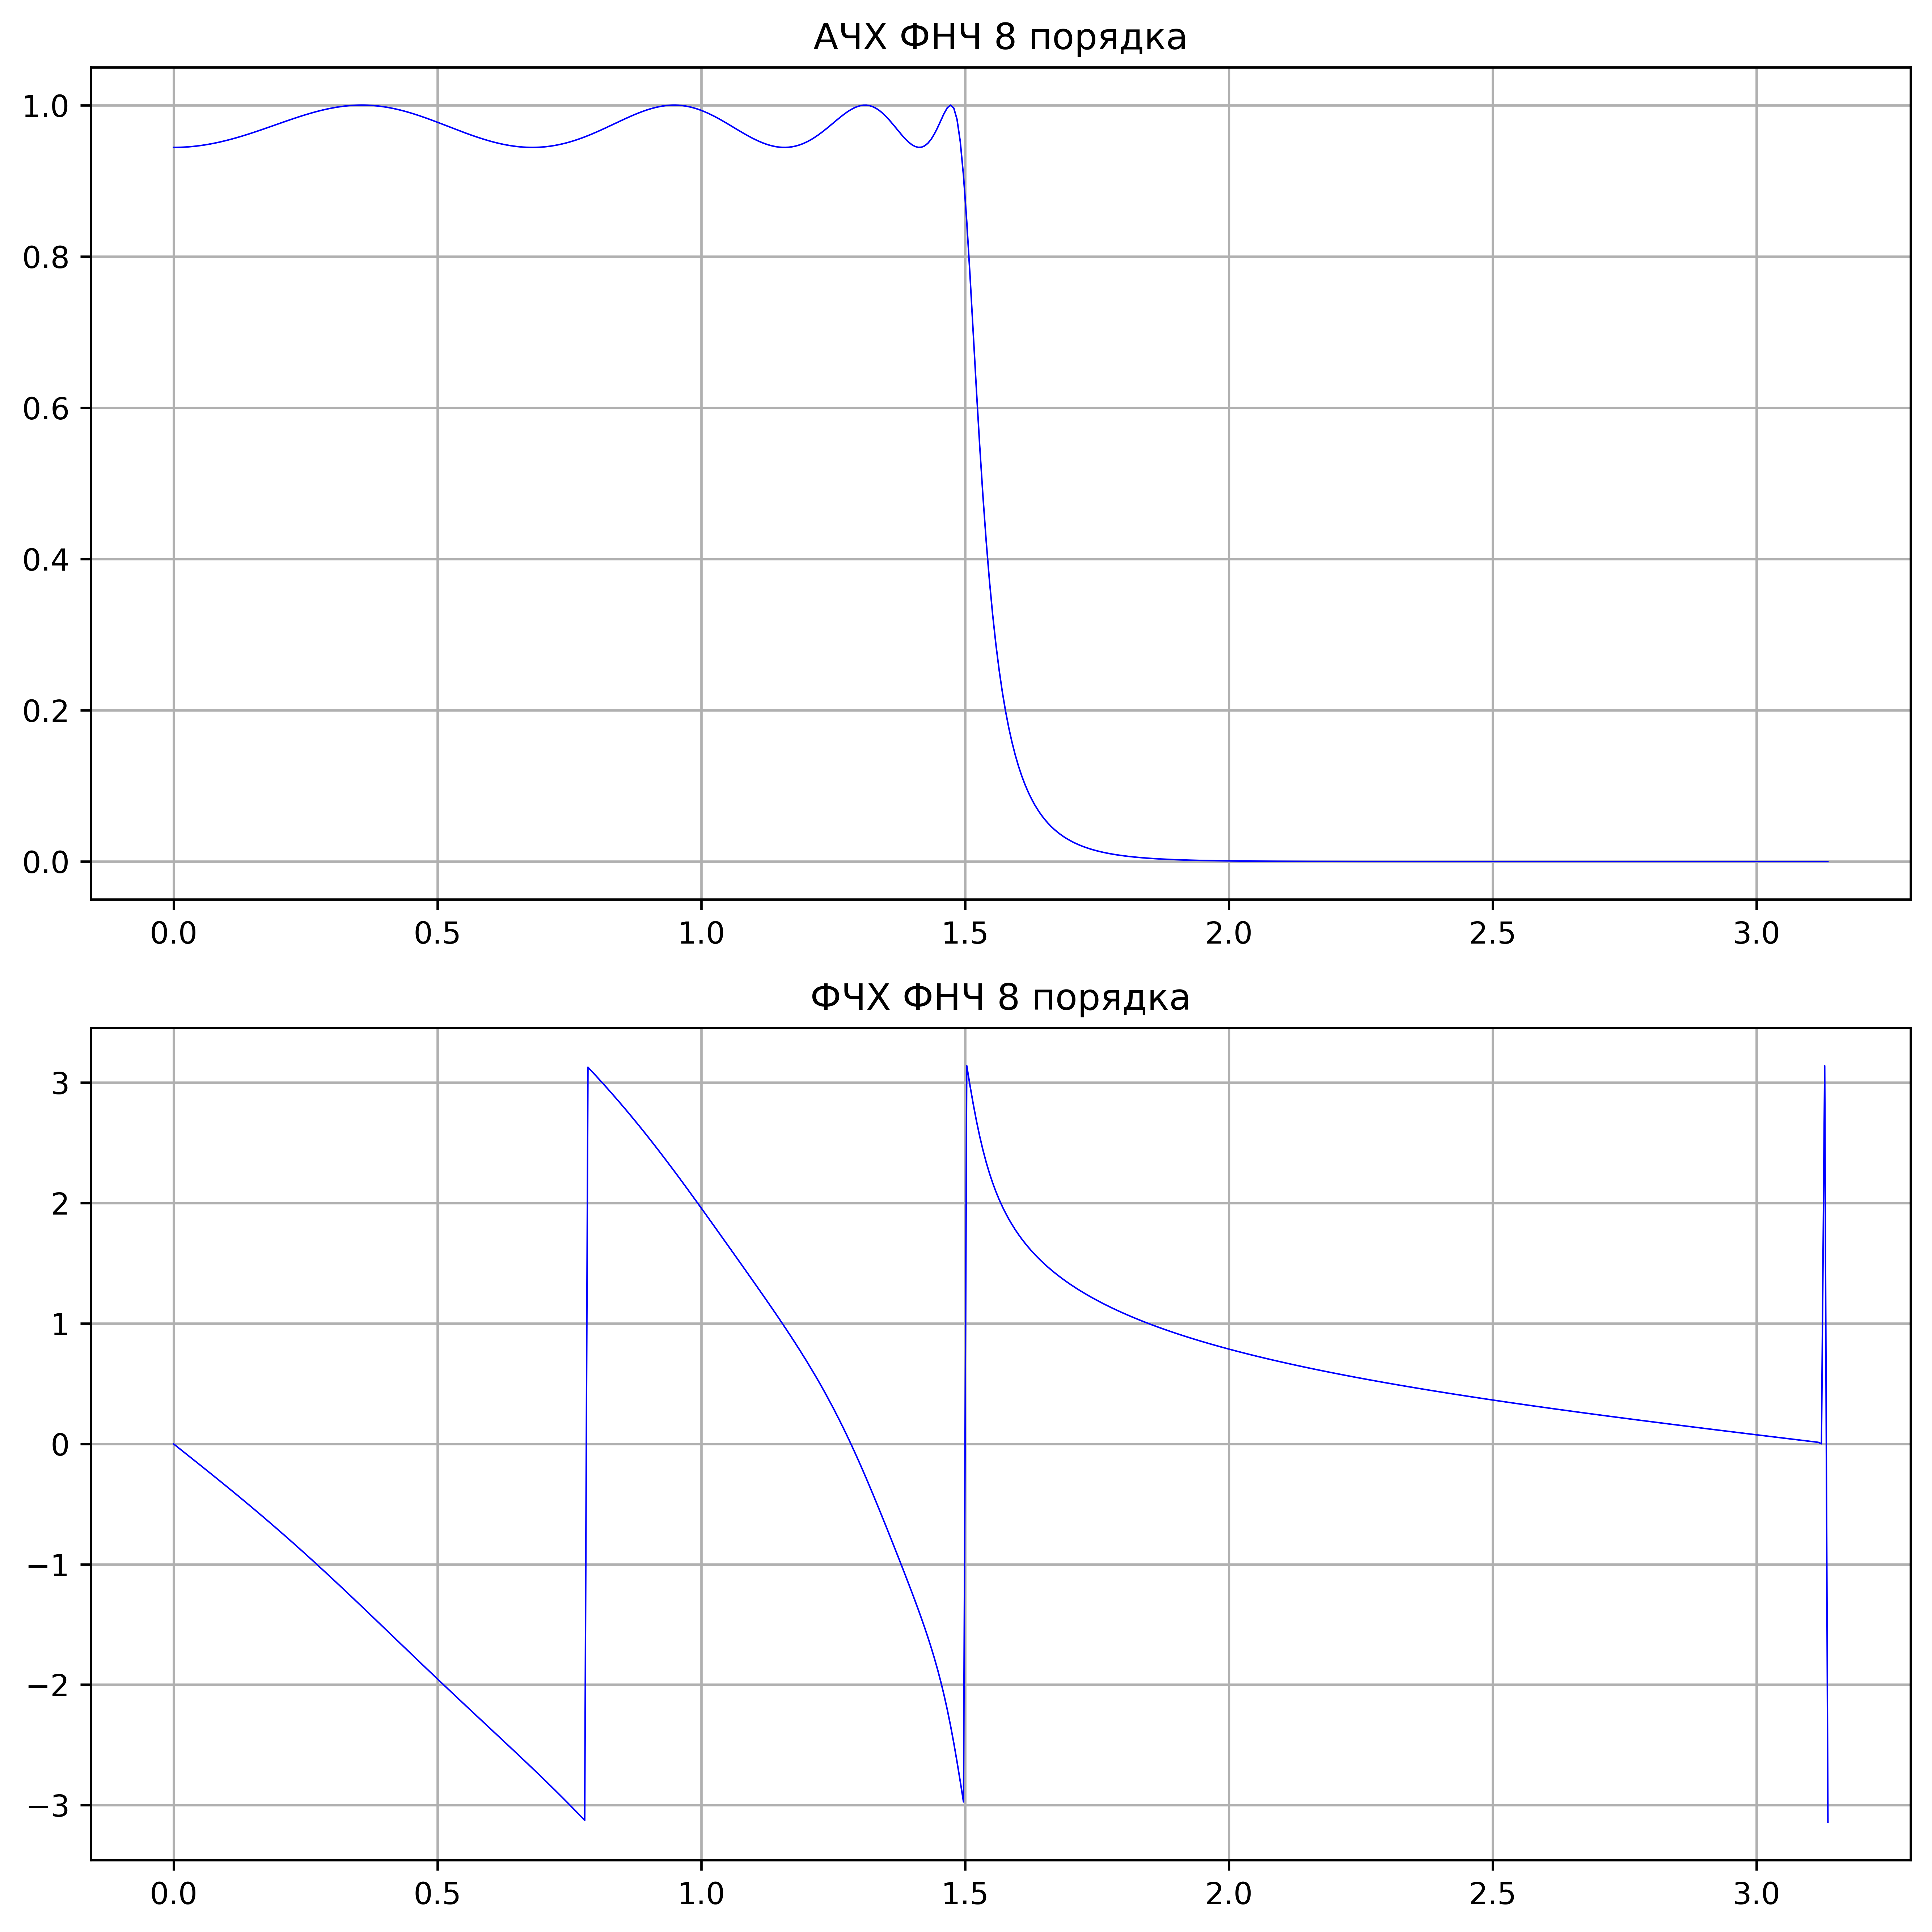

In [91]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

pylab.subplot(2, 1, 1)
pylab.plot(w, np.abs(h), linestyle='-', color='b', linewidth=0.5)
pylab.grid()
pylab.xlabel('')
pylab.ylabel('')
pylab.title(f'АЧХ ФНЧ {pow} порядка')

pylab.subplot(2, 1, 2)
pylab.plot(w, np.angle(h), linestyle='-', color='b', linewidth=0.5)
pylab.grid()
pylab.xlabel('')
pylab.ylabel('')
pylab.title(f'ФЧХ ФНЧ {pow} порядка')

pylab.tight_layout()
pylab.savefig('5_2_2_PH.png', dpi=600)
pylab.show()

# 5.2.3
Выполните задание 5.2.2, воспользовавшись функцией ellip и приняв минимальное затухание АЧХ в полосе подавления 30 дБ.

In [92]:
Rs = 30
b, a = ellip(pow, Rp, Rs, Nquist)
w, h = freqz(b, a)

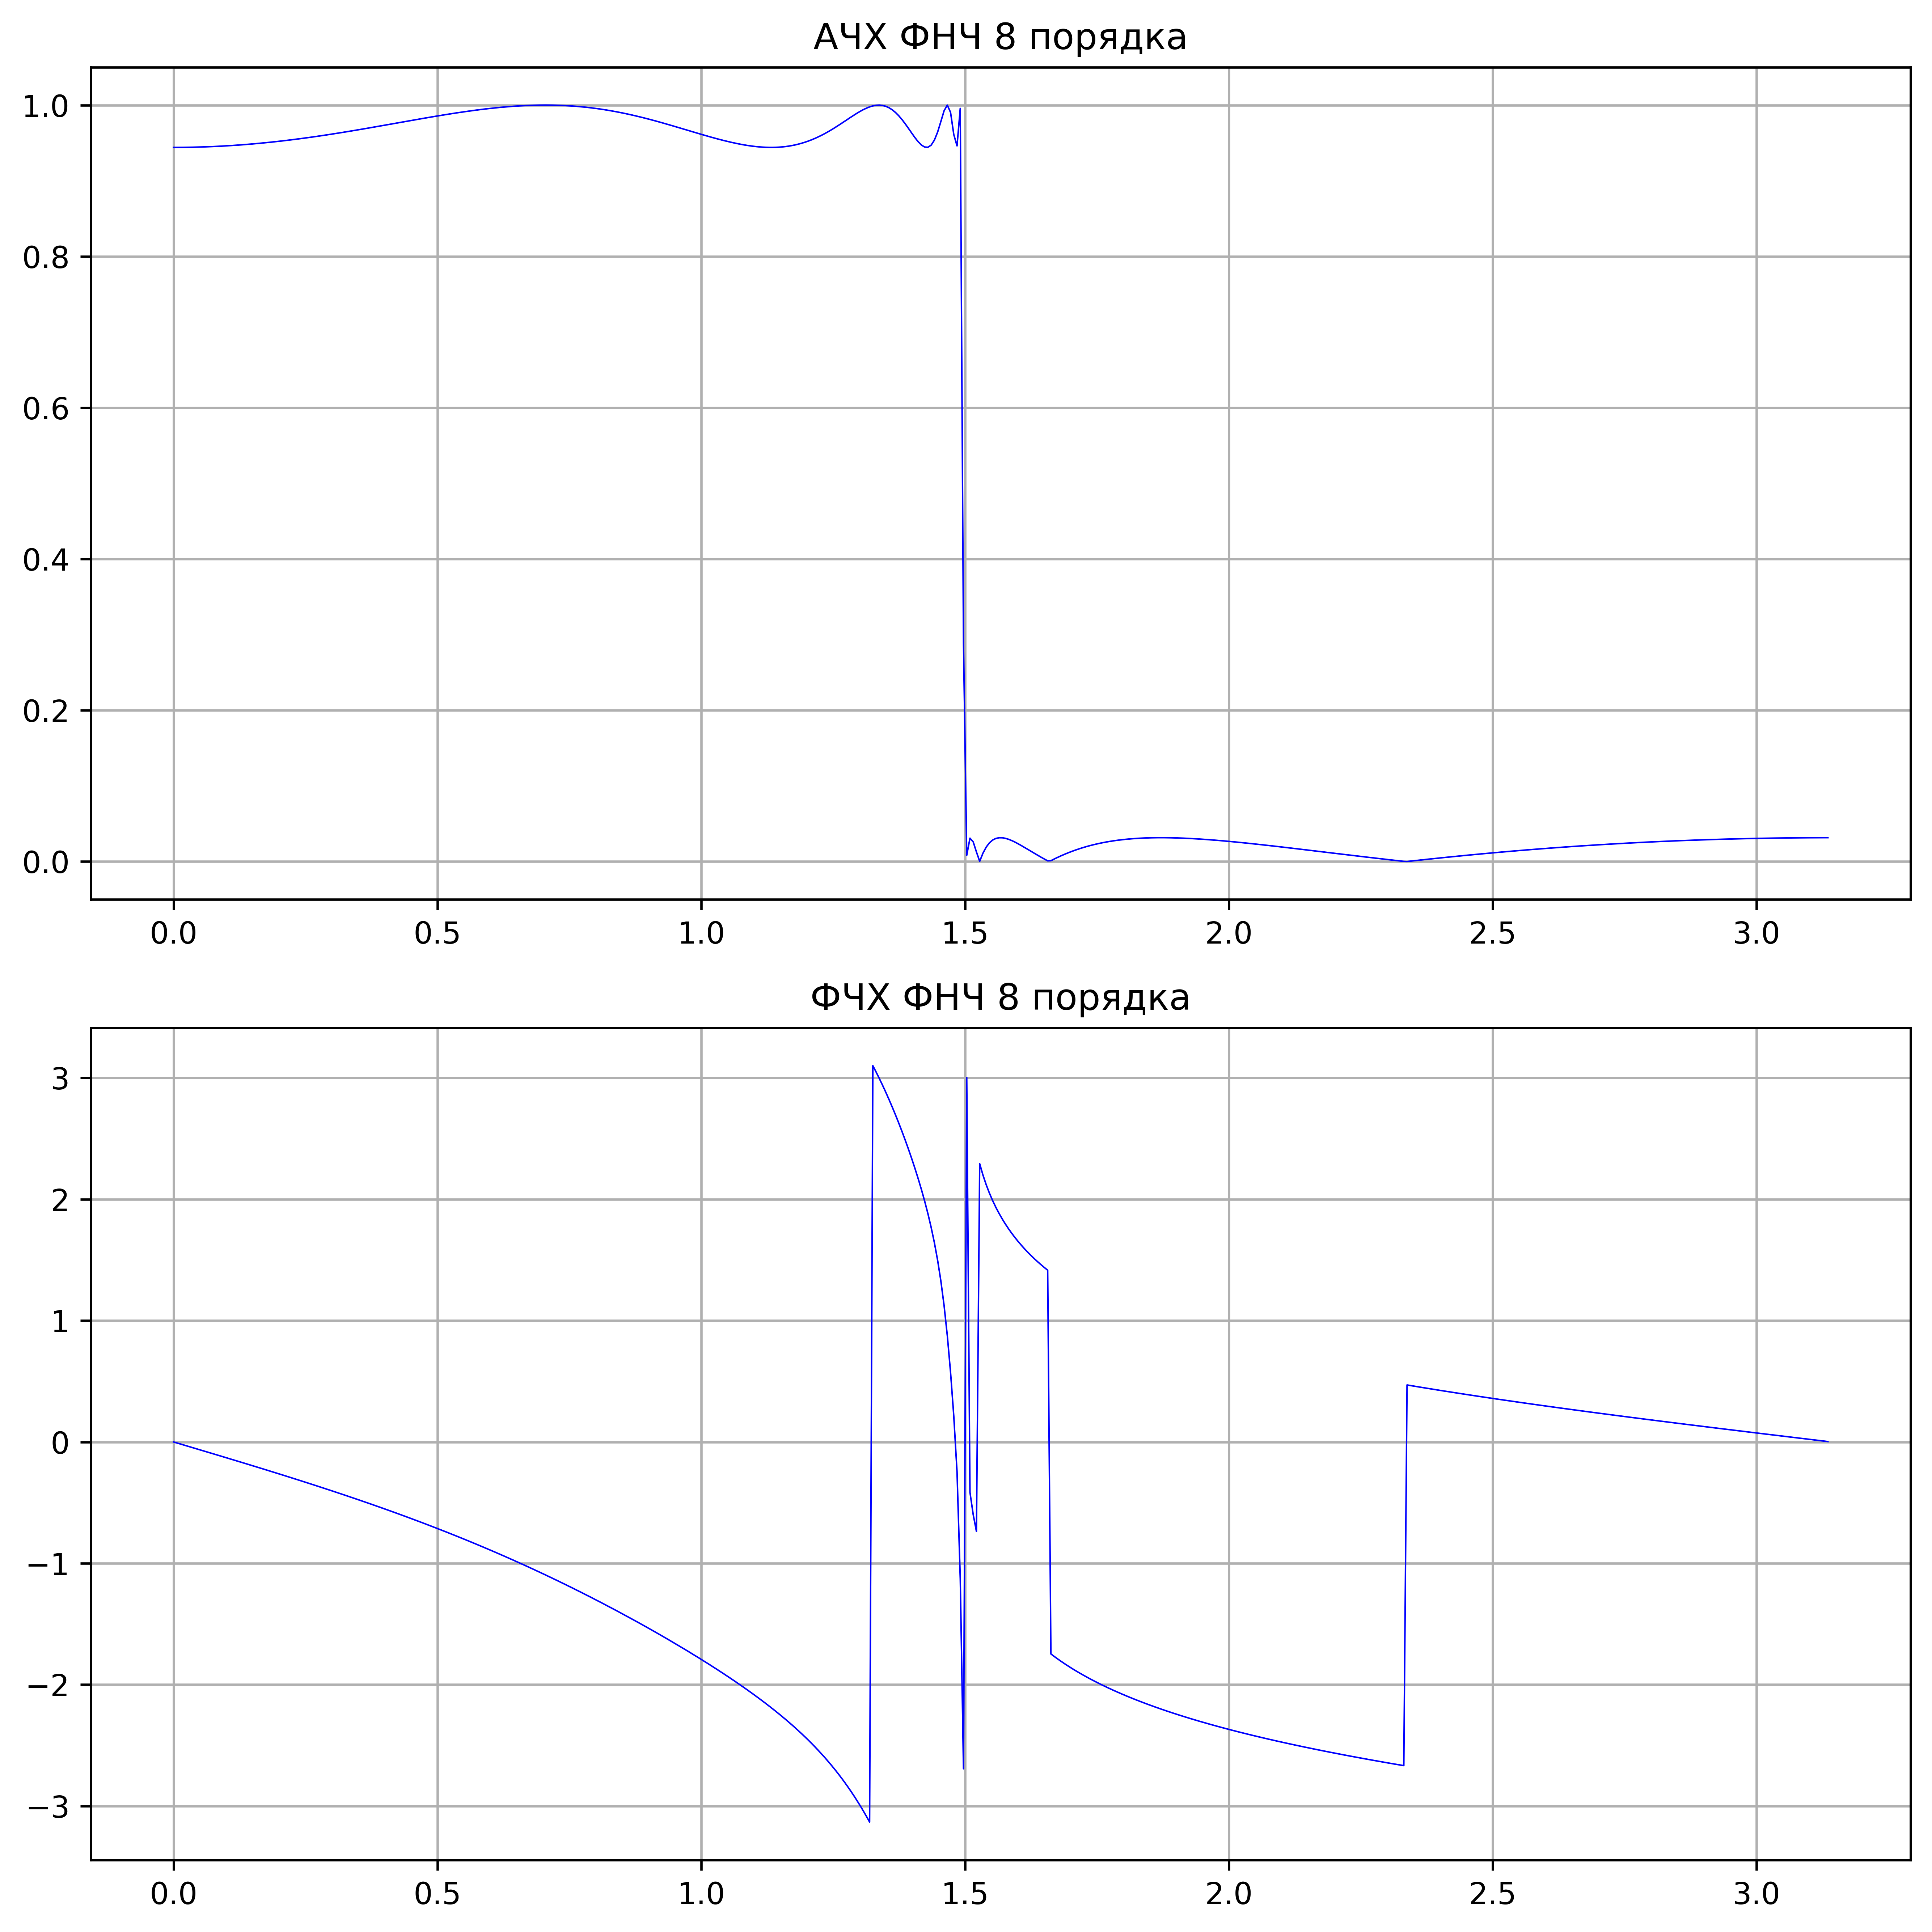

In [93]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

pylab.subplot(2, 1, 1)
pylab.plot(w, np.abs(h), linestyle='-', color='b', linewidth=0.5)
pylab.grid()
pylab.xlabel('')
pylab.ylabel('')
pylab.title(f'АЧХ ФНЧ {pow} порядка')

pylab.subplot(2, 1, 2)
pylab.plot(w, np.angle(h), linestyle='-', color='b', linewidth=0.5)
pylab.grid()
pylab.xlabel('')
pylab.ylabel('')
pylab.title(f'ФЧХ ФНЧ {pow} порядка')

pylab.tight_layout()
pylab.savefig('5_2_3_PH.png', dpi=600)
pylab.show()

# 5.2.4
Требуется цифровой ФВЧ со следующими параметрами:

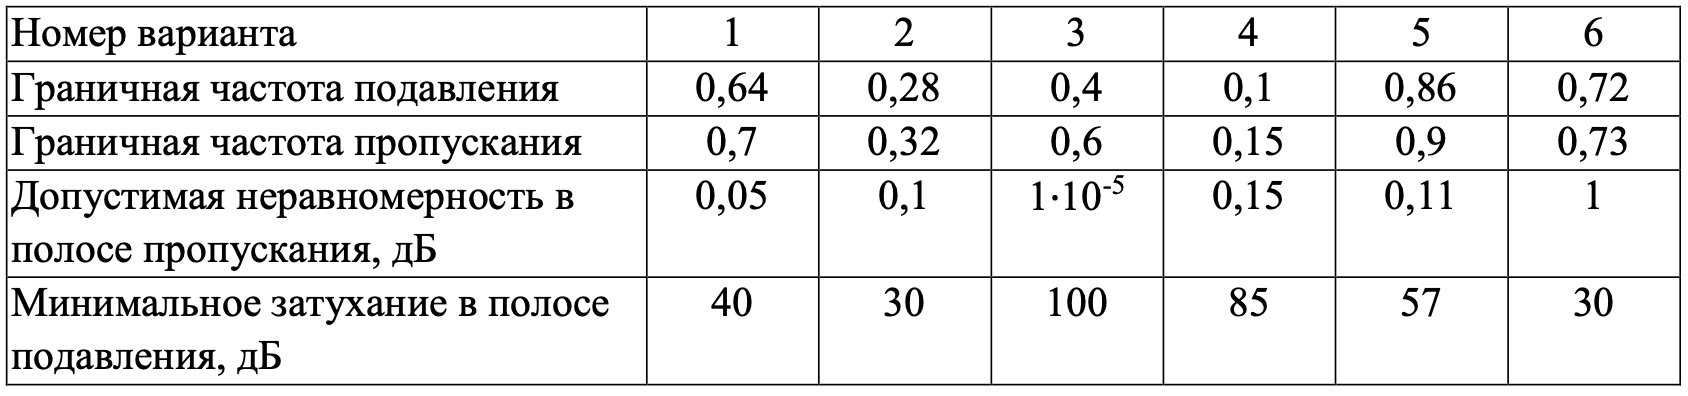

Какой порядок будет иметь такой фильтр с аппроксимациями Баттерворта, Чебышева типа I, Чебышева типаII, эллиптической? Сравните эффективность различных аппроксимаций при более жестких и более мягких требованиях к АЧХ.

In [94]:
Wp = 0.1   * Nquist
Ws = 0.15  * Nquist
Rp = 0.15 * Nquist
Rs = 85   * Nquist

print(f'Баттерворта: {buttord(Wp, Ws, Rp, Rs)[0]}')
print(f'Чебышева типа I: {cheb1ord(Wp, Ws, Rp, Rs)[0]}')
print(f'Чебышева типа II: {cheb2ord(Wp, Ws, Rp, Rs)[0]}')
print(f'Эллиптический: {ellipord(Wp, Ws, Rp, Rs)[0]}')

Баттерворта: 17
Чебышева типа I: 8
Чебышева типа II: 8
Эллиптический: 5


# 5.2.5
Исследуйте, как скажется на АЧХ и ФЧХ фильтров из заданий 5.2.1–5.2.3 усечение коэффициентов передаточной функции до четырех десятичных разрядов,до двух разрядов? Сделайте выводы.

In [95]:
def roundBA(b, a, r):
    b = np.round(b, r)
    a = np.round(a, r)
    return b, a

In [96]:
def roundFilter(i, j, r):
    global pow, Nquist
    
    # Фильтр Баттерворт
    b, a = butter(pow, Nquist)
    b, a = roundBA(b, a, r)
    w, h = freqz(b, a)
    pylab.subplot(10, 4, (i * 8 + j + 1))
    pylab.plot(w, np.angle(h), linestyle='-', color='b', linewidth=0.5)
    pylab.grid()
    pylab.title(f'AЧХ Баттерворт {pow} порядка; Округление {r}')
    
    pylab.subplot(10, 4, (i * 8 + j + 5))
    pylab.plot(w, np.angle(h), linestyle='-', color='b', linewidth=0.5)
    pylab.grid()
    pylab.title(f'ФЧХ Баттерворт {pow} порядка; Округление {r}')

    
    # Фильтр Чебышева 1
    b, a = cheby1(pow, Rp, Nquist)
    w, h = freqz(b, a)
    
    pylab.subplot(10, 4, (i * 8 + j + 2))
    pylab.plot(w, np.angle(h), linestyle='-', color='b', linewidth=0.5)
    pylab.grid()
    pylab.title(f'AЧХ Чебышева I {pow} порядка; Округление {r}')
   
    pylab.subplot(10, 4, (i * 8 + j + 6))
    pylab.plot(w, np.angle(h), linestyle='-', color='b', linewidth=0.5)
    pylab.grid()
    pylab.title(f'ФЧХ Чебышева I {pow} порядка; Округление {r}')

    
    # Фильтр Чебышева 2
    b, a = cheby2(pow, Rp, Nquist)
    w, h = freqz(b, a)
   
    pylab.subplot(10, 4, (i * 8 + j + 3))
    pylab.plot(w, np.angle(h), linestyle='-', color='b', linewidth=0.5)
    pylab.grid()
    pylab.title(f'AЧХ Чебышева II {pow} порядка; Округление {r}')
    
    pylab.subplot(10, 4, (i * 8 + j + 7))
    pylab.plot(w, np.angle(h), linestyle='-', color='b', linewidth=0.5)
    pylab.grid()
    pylab.title(f'ФЧХ Чебышева II {pow} порядка; Округление {r}')

    
    # Фильтр элептический
    Rs = 30
    b, a = ellip(pow, Rp, Rs, Nquist)
    w, h = freqz(b, a)
    
    pylab.subplot(10, 4, (i * 8 + j + 4))
    pylab.plot(w, np.abs(h), linestyle='-', color='b', linewidth=0.5)
    pylab.grid()
    pylab.title(f'AЧХ Эллиптическая {pow} порядка; Округление {r}')

    pylab.subplot(10, 4, (i * 8 + j + 8))
    pylab.plot(w, np.angle(h), linestyle='-', color='b', linewidth=0.5)
    pylab.grid()
    pylab.title(f'ФЧХ Эллиптическая {pow} порядка; Округление {r}')

In [97]:
pylab.figure(figsize=(18.0, 18.0), dpi=600)

roundFilter(0, 0, 4)
roundFilter(1, 0, 3)
roundFilter(2, 0, 2)
roundFilter(3, 0, 1)
roundFilter(4, 0, 0)

pylab.tight_layout()
pylab.savefig('5_2_5_PH.png', dpi=600)
pylab.show()